#### This interactive Python notebook is about your assignment (course work) to do some data analysis about sampled data regarding the key elements and ingredients leading to high quality white wines. 

In [90]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1: Import the data as of the Excel file "winequality-white.cvs". Subsequently, write the code that displays the number of rows and columns in your imported data sample. [1 Mark]

In [91]:
wd= pd.read_csv('winequality-white.csv')
wd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### Task 2: Write the code and type in the answer to the question “which are the three top independent (feature) variables with the least spread of data values?”. [1 Mark]

In [92]:
wd.std()
df= pd.DataFrame(wd.std())
df= df.sort_values(by=[0])[0:3]
df

,0
density,0.002991
chlorides,0.021848
volatile acidity,0.100795


The top three independent variables with the least spread of data are 'density', 'chlorides' and 'volatile acidity'

#### Task 3: Write the code to generate and display the correlation matrix among all 12 variables (feature and target variables). Subsequently, answer the question about the top three feature variables, which appear to have the strongest correlation with the target variable “quality”. [3 Marks]

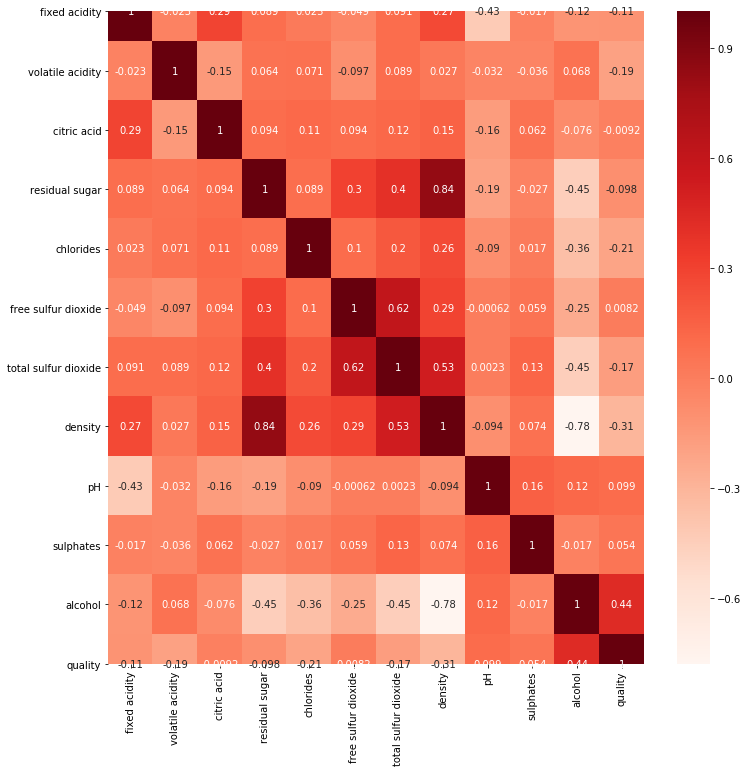

In [93]:
plt.figure(figsize= (12,12))
cor= wd.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

The most positively correlated each variable is separated or identifiable by the deepest colour next to the value 1 for each variable and the most negatively correlated is the lightest in colour

#### Task 4: Write the code to examine which variables do follow the normal (Gaussian) distribution. Subsequently, provide and justify your answer based on your observations. [3 Marks]

In [94]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest, shapiro
from matplotlib import pyplot


In [95]:
data=wd['fixed acidity'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

6.854787668436097
0.8437820791264506


In [96]:
stat,p = shapiro(data)
stat,p

(0.9765733480453491, 1.1670058868147737e-27)

In [97]:
kstest(data,'norm')

KstestResult(statistic=0.9999276519560749, pvalue=0.0)

(array([  2.,   0.,   0.,   2.,   0.,   4.,   1.,   5.,   9.,   7.,  24.,
         51.,  27.,  28.,  31.,  71.,  88., 224., 184., 155., 194., 188.,
        281., 515., 236., 308., 241., 232., 202., 384., 194., 123., 153.,
         93.,  93., 154.,  56.,  56.,  52.,  35.,  32.,  40.,  18.,  16.,
         17.,   6.,  21.,  14.,   2.,   5.,   4.,   8.,   2.,   3.,   1.,
          2.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 3.8       ,  3.91685393,  4.03370787,  4.1505618 ,  4.26741573,
         4.38426966,  4.5011236 ,  4.61797753,  4.73483146,  4.85168539,
         4.96853933,  5.08539326,  5.20224719,  5.31910112,  5.43595506,
         5.55280899,  5.66966292,  5.78651685,  5.90337079,  6.02022472,
         6.13707865,  6.25393258,  6.37078652,  6.48764045,  6.60449438,
         6.72134831,  6.838

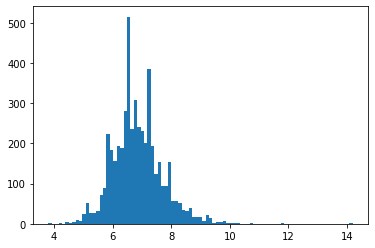

In [98]:
plt.hist(data,bins=shared_bins)

In [99]:
data=wd['volatile acidity'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

0.27824111882400976
0.10078425854188974


In [100]:
stat,p = shapiro(data)
stat,p


(0.9045486450195312, 0.0)

In [101]:
kstest(data,'norm')

KstestResult(statistic=0.5408168172006574, pvalue=0.0)

(array([  6.,  12.,  16.,  81.,  57.,  97., 283., 178., 175., 218., 421.,
        220., 261., 481., 223., 271., 163., 350., 188., 141., 230., 105.,
         69.,  65., 122.,  59.,  38.,  83.,  29.,  32.,  35.,  17.,  16.,
         10.,  18.,  10.,  17.,  13.,   7.,   8.,   7.,  16.,   2.,   7.,
          9.,   5.,   4.,   5.,   3.,   0.,   1.,   2.,   2.,   0.,   2.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   1.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([0.08      , 0.09291139, 0.10582278, 0.11873418, 0.13164557,
        0.14455696, 0.15746835, 0.17037975, 0.18329114, 0.19620253,
        0.20911392, 0.22202532, 0.23493671, 0.2478481 , 0.26075949,
        0.27367089, 0.28658228, 0.29949367, 0.31240506, 0.32531646,
        0.33822785, 0.35113924, 0.36405063, 0.37696203, 0.38987342,
        0.40278481, 0.4156962 , 0.42860759, 0.44151899, 0.45443038,
        0.46734177, 0.48025316, 0.49316456, 0.506075

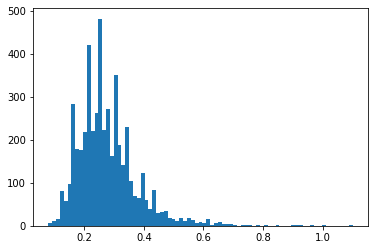

In [102]:
plt.hist(data,bins=shared_bins)

In [103]:
data=wd['citric acid'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

0.33419150673744386
0.12100744957029214


In [104]:
stat,p = shapiro(data)
stat,p

(0.9222353100776672, 9.80908925027372e-45)

In [105]:
kstest(data,'norm')

KstestResult(statistic=0.5279035695262004, pvalue=0.0)

(array([ 26.,   6.,  14.,   5.,  18.,   4.,  12.,  15.,  19.,  44.,  23.,
         33.,  76.,  48., 136., 104.,  83., 317., 219., 498., 223., 307.,
        457., 183., 362., 177., 134., 223., 117., 177.,  37., 109.,  51.,
         38., 254.,  35.,  48.,  16.,  19.,  33.,  13.,  27.,   6.,   9.,
         18.,   6.,  15.,   7.,   7.,   8.,   9.,  10.,  41.,   0.,   0.,
          2.,   4.,   2.,   2.,   0.,   0.,   1.,   1.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   1.,   5.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.0140678 , 0.02813559, 0.04220339, 0.05627119,
        0.07033898, 0.08440678, 0.09847458, 0.11254237, 0.12661017,
        0.14067797, 0.15474576, 0.16881356, 0.18288136, 0.19694915

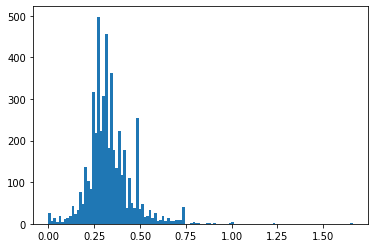

In [106]:
plt.hist(data,bins=shared_bins)

In [107]:
data=wd['residual sugar'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

6.391414863209474
5.071539989333933


In [108]:
stat,p = shapiro(data)
stat,p

(0.8845694661140442, 0.0)

In [109]:
kstest(data,'norm')

KstestResult(statistic=0.8294217299886929, pvalue=0.0)

(array([991., 743., 233., 214., 311., 245., 294., 318., 224., 149., 195.,
        177., 175., 152., 143., 103.,  67.,  74.,  43.,  21.,  15.,   2.,
          3.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([ 0.6       ,  1.55882353,  2.51764706,  3.47647059,  4.43529412,
         5.39411765,  6.35294118,  7.31176471,  8.27058824,  9.22941176,
        10.18823529, 11.14705882, 12.10588235, 13.06470588, 14.02352941,
        14.98235294, 15.94117647, 16.9       , 17.85882353, 18.81764706,
        19.77647059, 20.73529412, 21.69411765, 22.65294118, 23.61176471,
        24.57058824, 25.52941176, 26.48823529, 27.44705882, 28.40588235,
        29.36470588, 30.32352941, 31.28235294, 32.24117647, 33.2       ,
        34.15882353, 35

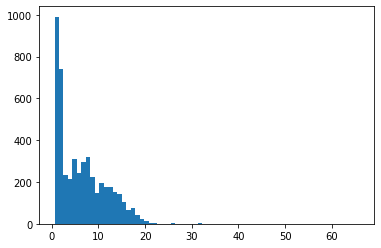

In [110]:
plt.hist(data,bins=shared_bins)

In [111]:
data=wd['residual sugar'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

6.391414863209474
5.071539989333933


In [112]:
stat,p = shapiro(data)
stat,p

(0.8845694661140442, 0.0)

In [113]:
kstest(data,'norm')

KstestResult(statistic=0.8294217299886929, pvalue=0.0)

(array([991., 743., 233., 214., 311., 245., 294., 318., 224., 149., 195.,
        177., 175., 152., 143., 103.,  67.,  74.,  43.,  21.,  15.,   2.,
          3.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([ 0.6       ,  1.55882353,  2.51764706,  3.47647059,  4.43529412,
         5.39411765,  6.35294118,  7.31176471,  8.27058824,  9.22941176,
        10.18823529, 11.14705882, 12.10588235, 13.06470588, 14.02352941,
        14.98235294, 15.94117647, 16.9       , 17.85882353, 18.81764706,
        19.77647059, 20.73529412, 21.69411765, 22.65294118, 23.61176471,
        24.57058824, 25.52941176, 26.48823529, 27.44705882, 28.40588235,
        29.36470588, 30.32352941, 31.28235294, 32.24117647, 33.2       ,
        34.15882353, 35

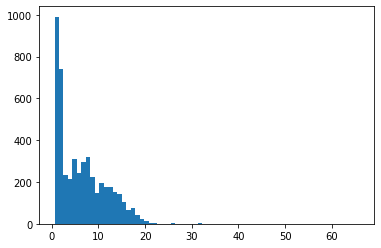

In [114]:
plt.hist(data,bins=shared_bins)

In [115]:
data=wd['chlorides'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

0.04577235606369947
0.02184573768505638


In [116]:
stat,p = shapiro(data)
stat,p

(0.5908077955245972, 0.0)

In [117]:
kstest(data,'norm')

KstestResult(statistic=0.5049725145855052, pvalue=0.0)

(array([  1.,   1.,   1.,   8.,  10.,  10.,  25.,  38.,  20.,  64., 112.,
         85., 189., 216., 119., 298., 200., 327., 339., 147., 325., 371.,
        181., 345., 303., 115., 234., 160.,  88., 121.,  36.,  65.,  48.,
         15.,  26.,  25.,  18.,  11.,   7.,   8.,  11.,   3.,   4.,   6.,
          2.,  10.,   7.,   3.,   3.,   3.,   3.,   8.,   8.,   1.,   4.,
          0.,   1.,   1.,   1.,   0.,   2.,   3.,   1.,   1.,   1.,   3.,
          4.,   1.,   3.,   4.,   0.,   5.,   0.,   1.,   1.,   1.,   1.,
          3.,   2.,   0.,   3.,   0.,   2.,   3.,   1.,   2.,   2.,   0.,
          1.,   1.,   5.,   2.,   0.,   0.,   0.,   0.,   5.,   4.,   1.,
          4.,   4.,   2.,   0.,   1.,   1.,   0.,   2.,   3.,   0.,   0.,
          0.,   0.,   1.,   0.,   2.,   0.,   3.,   0.,   1.,   0.,   0.,
          3.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0., 

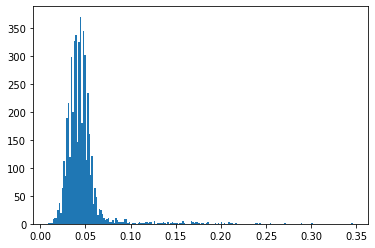

In [118]:
plt.hist(data,bins=shared_bins)

In [119]:
data=wd['free sulfur dioxide'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

35.30808493262556
17.005401105808414


In [120]:
stat,p = shapiro(data)
stat,p

(0.942058801651001, 3.83382648153091e-40)

In [121]:
kstest(data,'norm')

KstestResult(statistic=0.9984459370030779, pvalue=0.0)

(array([ 22.,  82., 119.,  97., 203., 227., 186., 306., 358., 372., 232.,
        349., 369., 193., 297., 244., 221., 155., 199., 161.,  81., 129.,
         82.,  32.,  63.,  23.,  24.,  11.,  11.,  14.,   2.,   7.,   1.,
          1.,   4.,   4.,   2.,   0.,   2.,   4.,   1.,   0.,   0.,   1.,
          1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  2.        ,   4.70754717,   7.41509434,  10.12264151,
         12.83018868,  15.53773585,  18.24528302,  20.95283019,
         23.66037736,  26.36792453,  29.0754717 ,  31.78301887,
         34.49056604,  37.19811321,  39.90566038,  42.61320755,
         45.32075472,  48.

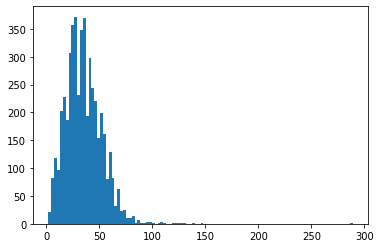

In [122]:
plt.hist(data,bins=shared_bins)

In [123]:
data=wd['total sulfur dioxide'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

138.36065741118824
42.49372602475034


In [124]:
stat,p = shapiro(data)
stat,p

(0.9890115857124329, 4.355319441087306e-19)

In [125]:
kstest(data,'norm')

KstestResult(statistic=1.0, pvalue=0.0)

(array([  2.,   4.,  11.,   6.,  10.,  16.,  19.,  41.,  65., 115., 137.,
        174., 203., 282., 303., 351., 315., 316., 248., 264., 290., 248.,
        227., 223., 197., 159., 153., 128.,  85.,  97.,  58.,  40.,  39.,
         23.,  22.,  13.,   4.,   0.,   2.,   1.,   0.,   1.,   1.,   1.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  9.        ,  15.84126984,  22.68253968,  29.52380952,
         36.36507937,  43.20634921,  50.04761905,  56.88888889,
         63.73015873,  70.57142857,  77.41269841,  84.25396825,
         91.0952381 ,  97.93650794, 104.77777778, 111.61904762,
        118.46031746, 125.3015873 , 132.14285714, 138.98412698,
        145.82539683, 152.66666667, 159.50793651, 166.34920635,
        173.19047619, 180.03174603, 186.87301587, 193.71428571,
        200.55555556, 207.3968254 , 214.23809524, 221.07936508,
        227.92063492, 234.76190476, 241.6031746 , 248.444444

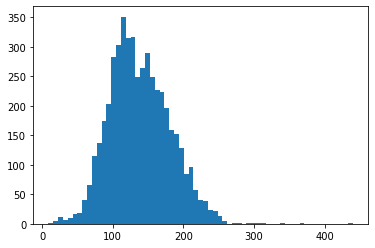

In [126]:
plt.hist(data,bins=shared_bins)

In [127]:
data=wd['density'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

0.9940273764801959
0.0029906015821480306


In [128]:
stat,p = shapiro(data)
stat,p

(0.9548046588897705, 1.7806248018391963e-36)

In [129]:
kstest(data,'norm')

KstestResult(statistic=0.8382056420155723, pvalue=0.0)

(array([  9.,   5.,  23.,  66., 155., 164., 242., 272., 293., 331., 290.,
        342., 264., 280., 284., 237., 318., 182., 182., 162., 187., 236.,
        117.,  86.,  76.,  61.,  13.,  10.,   4.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([0.98711   , 0.98762356, 0.98813713, 0.98865069, 0.98916426,
        0.98967782, 0.99019139, 0.99070495, 0.99121851, 0.99173208,
        0.99224564, 0.99275921, 0.99327277, 0.99378634, 0.9942999 ,
        0.99481347, 0.99532703, 0.99584059, 0.99635416, 0.99686772,
        0.99738129, 0.99789485, 0.998408

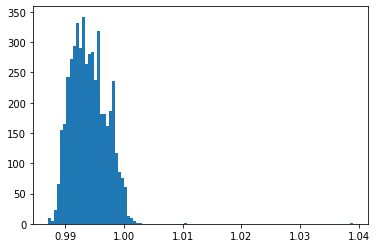

In [130]:
plt.hist(data,bins=shared_bins)

In [131]:
data=wd['pH'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

3.1882666394446715
0.15098518431212068


In [132]:
stat,p = shapiro(data)
stat,p

(0.9881061911582947, 6.633951677288629e-20)

In [133]:
kstest(data,'norm')

KstestResult(statistic=0.9967888554366511, pvalue=0.0)

(array([  2.,   0.,   1.,   6.,   1.,  14.,  18.,  28.,  46.,  56., 124.,
         73., 142., 117., 175., 283., 228., 261., 251., 308., 426., 282.,
        241., 248., 210., 257., 172., 135., 127., 132., 137.,  78.,  53.,
         45.,  42.,  52.,  30.,  23.,  13.,  11.,  11.,   8.,   9.,   3.,
          3.,   3.,   4.,   4.,   1.,   4.]),
 array([2.72 , 2.742, 2.764, 2.786, 2.808, 2.83 , 2.852, 2.874, 2.896,
        2.918, 2.94 , 2.962, 2.984, 3.006, 3.028, 3.05 , 3.072, 3.094,
        3.116, 3.138, 3.16 , 3.182, 3.204, 3.226, 3.248, 3.27 , 3.292,
        3.314, 3.336, 3.358, 3.38 , 3.402, 3.424, 3.446, 3.468, 3.49 ,
        3.512, 3.534, 3.556, 3.578, 3.6  , 3.622, 3.644, 3.666, 3.688,
        3.71 , 3.732, 3.754, 3.776, 3.798, 3.82 ]),
 <a list of 50 Patch objects>)

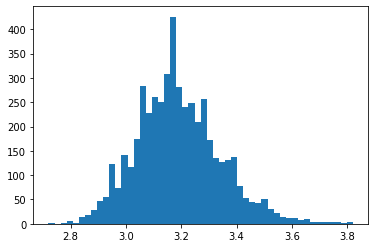

In [134]:
plt.hist(data,bins=shared_bins)

In [135]:
data=wd['sulphates'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

0.48984687627603113
0.1141141831056649


In [136]:
stat,p = shapiro(data)
stat,p

(0.951604425907135, 1.8156972845314579e-37)

In [137]:
kstest(data,'norm')

KstestResult(statistic=0.6072948439937709, pvalue=0.0)

(array([  2.,   4.,   4.,  26.,  47.,  35., 113.,  84., 205., 343., 151.,
        307., 342., 216., 403., 172., 345., 389., 156., 302., 210.,  83.,
        196.,  88., 113., 115.,  28.,  71.,  74.,  27.,  51.,  12.,  41.,
         35.,  19.,  21.,  18.,   2.,   7.,   2.,   9.,   6.,   0.,   2.,
          7.,   3.,   7.,   1.,   2.,   0.,   0.,   1.,   1.]),
 array([0.22      , 0.23622642, 0.25245283, 0.26867925, 0.28490566,
        0.30113208, 0.31735849, 0.33358491, 0.34981132, 0.36603774,
        0.38226415, 0.39849057, 0.41471698, 0.4309434 , 0.44716981,
        0.46339623, 0.47962264, 0.49584906, 0.51207547, 0.52830189,
        0.5445283 , 0.56075472, 0.57698113, 0.59320755, 0.60943396,
        0.62566038, 0.64188679, 0.65811321, 0.67433962, 0.69056604,
        0.70679245, 0.72301887, 0.73924528, 0.7554717 , 0.77169811,
        0.78792453, 0.80415094, 0.82037736, 0.83660377, 0.85283019,
        0.8690566 , 0.88528302, 0.90150943, 0.91773585, 0.93396226,
        0.95018868, 0.966415

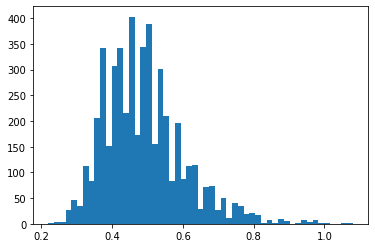

In [138]:
plt.hist(data,bins=shared_bins)

In [139]:
data=wd['alcohol'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
print(np.mean(data))
print(np.std(data))

10.51426704777011
1.2304949365368165


In [140]:
stat,p = shapiro(data)
stat,p

(0.955296516418457, 2.5578040326544056e-36)

In [141]:
kstest(data,'norm')

KstestResult(statistic=0.9999999999999993, pvalue=0.0)

(array([  2.,   3.,  32., 185., 424., 333., 460., 239., 245., 412., 238.,
        281., 231., 255., 297., 220., 111., 117., 243., 132., 146., 113.,
         78.,  40.,  32.,  17.,   5.,   7.]),
 array([ 8.        ,  8.22142857,  8.44285714,  8.66428571,  8.88571429,
         9.10714286,  9.32857143,  9.55      ,  9.77142857,  9.99285714,
        10.21428571, 10.43571429, 10.65714286, 10.87857143, 11.1       ,
        11.32142857, 11.54285714, 11.76428571, 11.98571429, 12.20714286,
        12.42857143, 12.65      , 12.87142857, 13.09285714, 13.31428571,
        13.53571429, 13.75714286, 13.97857143, 14.2       ]),
 <a list of 28 Patch objects>)

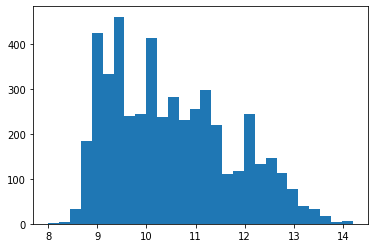

In [142]:
plt.hist(data, bins=shared_bins)

(array([  20.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  163.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1457.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 2198.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,  880.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  175.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    5.]),
 array([3.        , 3.11764706, 3.23529412, 3.35294118, 3.47058824,
        3.58823529, 3.70588235, 3.82352941, 3.94117647, 4.05882353,
        4.17647059, 4.29411765, 4.41176471, 4.52941176, 4.64705882,
        4.76470588, 4.88235294, 5.        , 5.11764706, 5.23529412,
        5.35294118, 5.47058824, 5.58823529, 5.70588235, 5.82352941,
        5.94117647, 6.05882353, 6.17647059, 6.29411765, 6.41176471,
        6.52941176, 6.64705882, 6.76470588, 6.88235294, 7.        ,
        7.11764706, 7.23529412, 7.35294118, 7.47058824, 7.58823529,
        7.70588235, 7.82352941, 7.94117647, 8.058

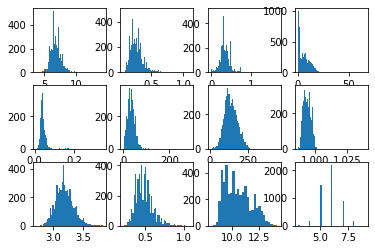

In [143]:
plt.subplot(3,4,1)
data=wd['fixed acidity'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,2)
data=wd['volatile acidity'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,3)
data=wd['citric acid'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,4)
data=wd['residual sugar'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,5)
data=wd['chlorides'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,6)
data=wd['free sulfur dioxide'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,7)
data=wd['total sulfur dioxide'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,8)
data=wd['density'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,9)
data=wd['pH'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,10)
data=wd['sulphates'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,11)
data=wd['alcohol'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

plt.subplot(3,4,12)
data=wd['quality'].values
shared_bins = np.histogram_bin_edges(data,bins='auto')
plt.hist(data, bins=shared_bins)

#The most normally distributed variable from the plot is 'pH'

#### Task 5: Modify the given code such that a Principal Component Analysis (PCA) is carried out for all feature (independent) variables. Subsequently, draw a Scree plot to explain the ratio of variance as well as modify the given code to answer the question “which feature variables mostly contribute to the observed variance distribution by more than 30%”. [5 Marks]

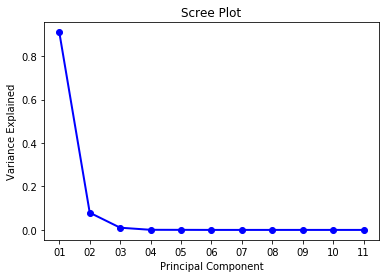

In [144]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X= pd.read_csv('winequality-white.csv',usecols= ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])

from sklearn.decomposition import PCA
pca = PCA(n_components=11)
vals = X.values

pca.fit(vals)
wines_pca = pca.fit_transform(vals)
pca.explained_variance_ratio_


np.arange(pca.n_components_)
PC_values=['01','02','03','04','05','06','07','08','09','10','11']
plt.plot(PC_values,pca.explained_variance_ratio_,'o-',linewidth=2, color='blue')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


#The Principal Component that contributes more than 30 percent to the Variance is PC1, as seen in the Scree plot

Text(0, 0.5, 'PC 2')

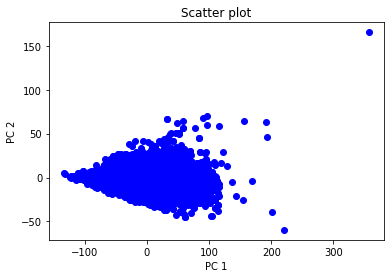

In [145]:
ax = plt.gca()
ax.scatter(wines_pca[:,0], wines_pca[:,1], color='blue')
ax.set_title("Scatter plot")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

The scatter plot consist of some outliner points. It is also almost impossible  to draw a single line of separation in between the different plots

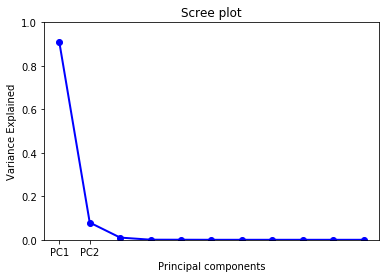

In [146]:

ax = plt.gca()

expl_var = pca.explained_variance_ratio_

ax.plot(expl_var,marker= 'o',linewidth=2, color= 'blue')

ax.set_title("Scree plot")

ax.set_ylim(0,1)

ax.set_xticks([0,1])

ax.set_xticklabels(["PC{}".format(i+1) for i in range(2)])

PC_values=np.arange(pca.n_components_)+1

plt.ylabel('Variance Explained')
plt.xlabel('Principal components')
plt.show()


[<matplotlib.axis.XTick at 0x15d06a08>, <matplotlib.axis.XTick at 0x16e4c148>]

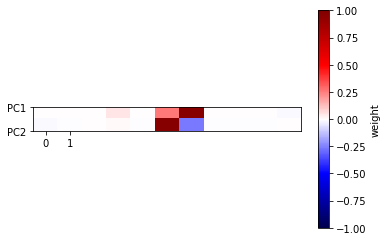

In [147]:
comps = pca.components_
ax = plt.gca()
img = ax.imshow(comps, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(img, label="weight")
ax.set_yticks([0,1])
t = ax.set_yticklabels(["PC{}".format(i+1)for i in range(2)])

ax.set_xticks([0,1])

In [148]:
# print(np.array(X_feature_names)[np.where(pca.components_[0,:] > 0.1)[0]])

#### Task 6: Write/modify the code to repeat task 5, this time, however, this time with normalized values across all feature variables. Explain the observed differences and answer again the question: Which feature variables mostly contribute to the observed variance distribution by more than 30%? [5 Marks]

In [149]:
# Normalize feature variables
from sklearn import preprocessing as pp

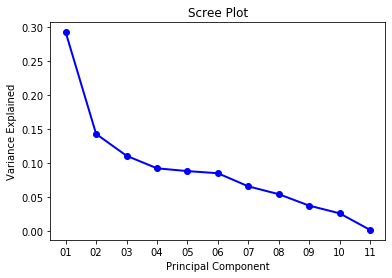

[0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


In [150]:
ss = pp.StandardScaler()
# ss.fit(X.values)
pca_norm = PCA()
# pca_norm.fit(ss.transform(X.values))
# wines_pca_norm = pca_norm.transform(ss.transform(X.values))
from sklearn.preprocessing import StandardScaler

X= pd.read_csv('winequality-white.csv',usecols= ['fixed acidity', 'volatile acidity','citric acid','residual sugar','chlorides',
                                               'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])

scaler = StandardScaler()

scaled_df=X.copy()

scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df),columns=scaled_df.columns)

from sklearn.decomposition import PCA
pca = PCA(n_components=11)
vals = X.values
vals=scaled_df
pca.fit(vals)
wines_pca = pca.fit_transform(vals)
pca.explained_variance_ratio_

import matplotlib.pyplot as plt
import numpy as np
PC_values=['01','02','03','04','05','06','07','08','09','10','11']
plt.plot(PC_values,pca.explained_variance_ratio_,'o-', linewidth=2, color= 'blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(pca.explained_variance_ratio_)



#The variable that contributes more than 30 percents of the observed variable is PC01 with 0.29293217 point value

In [151]:
#print(np.array(X_feature_names)[np.where(pca_norm.components_[0,:] > 0.3)[0]])

In [152]:
#print(np.array(X_feature_names)[np.where(pca_norm.components_[0,:] > 0.3)[0]])

#### Task 7: Write/modify the code to calculate the following two empirical probabilities (e.g., all 4898 rows as sample data): a) Probability of white wine quality to be less than 5, i.e., P(X<5), b) Probability of white wine quality to be equal or greater than 8, i.e., P(X ≥ 8), X = “quality”. [4 Marks]

In [153]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

In [154]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df1= pd.read_csv('winequality-white.csv')
df1.head(20)

df1 =df1.groupby(['quality']).quality.agg('count').to_frame('Count').reset_index()
print(df1)

#Probilit of less than 5 quality

Count_less_than_5 = df1[df1['quality']< 5]['Count'].sum()
Count_greater_than_or_equal_to_8 = df1[df1['quality']>= 8]['Count'].sum()

print('Count_less_than_5 = ',Count_less_than_5)
print('Count_greater_than_or_equal_to_8 = ',Count_greater_than_or_equal_to_8)
Totalcount  = df1[df1['quality']>0]['Count'].sum()
Totalcount
print('Totalcount = ',Totalcount)

Probability_Quality_Less_Than_5_quality=Count_less_than_5/Totalcount
print('Probability_Quality_Less_Than_5_quality = ',Probability_Quality_Less_Than_5_quality)


Probability_Quality_greater_than_or_equal_to_8=Count_greater_than_or_equal_to_8/Totalcount

print('Probability_Quality_greater_than_or_equal_to_8 = ',Probability_Quality_greater_than_or_equal_to_8)



   quality  Count
0        3     20
1        4    163
2        5   1457
3        6   2198
4        7    880
5        8    175
6        9      5
Count_less_than_5 =  183
Count_greater_than_or_equal_to_8 =  180
Totalcount =  4898
Probability_Quality_Less_Than_5_quality =  0.03736218864842793
Probability_Quality_greater_than_or_equal_to_8 =  0.03674969375255206


#### Task 8: Let us assume that French wine makers and producers claim that it is possible to produce next year 1,000,000 bottles of white wines, to be considered as a population, a) with an average of quality equal or greater than 7, b) the distribution of quality scores will not be equal. Formulate and implement the Null (Ho) and alternative (H1) hypotheses for both claims. Subsequently, elaborate on  rejecting or accepting these two claims, with confidence values 98% and 95%, respectively, and on the basis of evidence provided by your 4898 large sample data. [6 Marks]

In [198]:
from scipy import stats
from scipy.stats import ttest_1samp

In [199]:
x= df.quality.mean()
x

5.87790935075541

#### Task 9: Let us assume that you have a first attempt at estimating a simple linear regression model with all 11 predictor (feature) variables to be used for predicting the quality of white wine (target variable). Your initial model should take the form y = α + b1X1 + b2X2+….+b11X11, with α being the intercept and b1,…,b11 the co-efficients. Uncomment and modify the following code such that the model will be trained with a split of 75% training data and 25% of test data. You should also assume that the values of all predictor variables are normalised. You should also write the code to estimate the fitness of this model. The metrics to be used are R-square, Mean Squared Error and Root Mean Square Error. [6 Marks]

In [216]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Build linear regression model using different variables as predictors of quality
# Split data into predictors X and output Y


df= pd.read_csv('winequality-white.csv')
predictors = ['fixed acidity', 'density', 'citric acid', 'chlorides', 'free sulfur dioxide', 'volatile acidity', 'pH', 'alcohol', 'sulphates', 'residual sugar', 'total sulfur dioxide']
X = df[predictors]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Initialise and fit model

lm = LinearRegression()
model = lm.fit(X_train, y_train)

print("*******************************************************")
print("model.intercept")
print("******************")
print(f'alpha = {model.intercept_}')

print("")
print("*******************************************************")
print("")
print("model.coef")
print("******************")
print(f'betas = {model.coef_}')
print("*******************************************************")



*******************************************************
model.intercept
******************
alpha = 197.5310910320213

*******************************************************

model.coef
******************
betas = [ 1.15953365e-01 -1.98333673e+02 -1.66810488e-02 -5.13583573e-01
  4.74413246e-03 -1.81594265e+00  8.79948572e-01  1.31644131e-01
  6.27189921e-01  9.65149311e-02 -2.17957734e-04]
*******************************************************


In [ ]:
corr_matrix = np.corrcoef(y_test,y_pred)
corr = corr_matrix[0, 1]
RSQ = corr**2
print("")
print("")
print("R Square")
print(RSQ)

In [ ]:
corr_matrix = np.corrcoef(y_test,y_pred)
corr = corr_matrix[0, 1]
RSQ = corr**2
print("")
print("")
print("R Square")
print(RSQ)

#### Task 10: Based on the results of task 9, you should now make an attempt to improve your linear regression model by turning it into a polynomial expression. You shall assume that the initial raw data, not the normalised ones, will be taken into consideration. Uncomment the following code and blend it with the code from task 9 to re-train and re-estimate the fitness of your polynomial regression models with degrees 2 and 3. Subsequently, explain whether the performance of this more complicated version of the model has neem improved in terms of the same fitness measuring metrics. [6 Marks]

In [161]:
# import numpy as np
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

In [162]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [163]:
# poly = PolynomialFeatures(degree=3, include_bias=False)
# poly_features = poly.fit_transform(X.values)
# poly_reg_model = LinearRegression()
# poly_reg_model.fit(X_poly_train, y_train)

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [165]:
df = pd.read_csv('winequality-white.csv', sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Data Preparation

In [167]:
target = 'quality'
X = df.drop(target,axis=1)
y = df[target]

In [168]:
#Train set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
X_train.shape

(3918, 11)

In [170]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False).fit_transform(X)
X_pol

array([[7.00000000e+00, 2.70000000e-01, 3.60000000e-01, ...,
        1.37998080e+02, 2.69862912e+03, 5.27731917e+04],
       [6.30000000e+00, 3.00000000e-01, 3.40000000e-01, ...,
        2.05855737e+02, 3.99108063e+03, 7.73780938e+04],
       [8.10000000e+00, 2.80000000e-01, 4.00000000e-01, ...,
        1.99466274e+02, 4.57865764e+03, 1.05101005e+05],
       ...,
       [6.50000000e+00, 2.40000000e-01, 1.90000000e-01, ...,
        1.75751574e+02, 3.59144522e+03, 7.33904022e+04],
       [5.50000000e+00, 2.90000000e-01, 3.00000000e-01, ...,
        3.02828749e+02, 1.02005473e+04, 3.43597384e+05],
       [6.00000000e+00, 2.10000000e-01, 3.80000000e-01, ...,
        1.68246477e+02, 6.20408883e+03, 2.28775776e+05]])

In [171]:
X_pol.shape

(4898, 4367)

In [172]:
# Run standardization on X variables
X_train_scaled, X_test_scaled = scale(X_train), scale(X_test)
X_train_scaled

array([[ 0.51511931, -1.07623315,  0.22773076, ..., -0.32826101,
        -0.70244474,  1.54037099],
       [-0.66918809, -0.28877673,  0.89583195, ..., -0.06188569,
         0.26607415, -0.82171197],
       [-1.49820327,  0.40024764, -0.02280718, ...,  0.40427112,
         0.00193263,  0.48150622],
       ...,
       [ 0.87041153, -0.09191263,  1.56393313, ..., -1.12738698,
         0.35412132,  0.72585963],
       [-0.66918809, -0.38720878, -0.35685777, ..., -0.12847952,
        -0.96658625,  0.07425053],
       [ 1.46256523, -0.09191263,  0.14421812, ...,  0.20448963,
         1.23459303, -0.08865174]])

In [174]:
X_train_scaled.shape

(3918, 11)

In [175]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [176]:
#Train set cross-validation
lin_reg = LinearRegression().fit(X_train_scaled, y_train)

In [177]:
lr_scores = -1 * cross_val_score(lin_reg, 
                                 X_train_scaled, 
                                 y_train, 
                                 cv=cv)
lr_scores

array([-0.30503566, -0.23681022, -0.27957668, -0.27087678, -0.24766941,
       -0.26736163, -0.26805709, -0.22973045, -0.28936646, -0.34223002])

In [196]:
lr_score_train = np.mean(lr_scores)
lr_score_train

-0.2736714411799058

In [ ]:
#Predict
y_predicted = lin_reg.predict(X_test_scaled)
lr_score_test = mean_squared_error(y_test, y_predicted, squared=False) #RMSE instead of MSE
lr_score_test

In [181]:
#Evaluate different numbers of Principal components

lin_reg = LinearRegression()
rmse_list = []

In [182]:
# First generate all the principal components
pca = PCA()
X_train_pc = pca.fit_transform(X_train_scaled)
X_train_pc.shape

(3918, 11)

In [183]:
# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,10
0,0.153130,0.593869,0.113250,0.042745,0.213469,0.134625,-0.194105,-0.584225,0.346548,-0.128133,-0.173252
1,0.011361,-0.050665,-0.575843,0.312131,0.662860,-0.100609,0.220231,-0.018302,-0.138301,-0.224521,-0.020090
2,0.140480,0.363638,0.492552,0.140582,0.082233,-0.138273,0.697305,0.161543,-0.214950,-0.033970,-0.009646
3,0.429776,-0.017826,-0.211475,-0.256870,0.014734,0.297510,0.207713,0.400846,0.394997,0.093459,-0.496953
4,0.209227,0.009398,-0.103175,0.672829,-0.359287,-0.445155,-0.059703,0.105600,0.384851,0.045278,-0.025786


In [184]:
# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv).mean()
    rmse_list.append(rmse_score)

In [185]:
rmse_list

[-0.07846794473611723,
 -0.08249208570825767,
 -0.13523601339713262,
 -0.16927018411309216,
 -0.17136572284154267,
 -0.1709839173271101,
 -0.17055862147121006,
 -0.2000971744694109,
 -0.2701491155141244,
 -0.273853976244398,
 -0.2736714411799057]

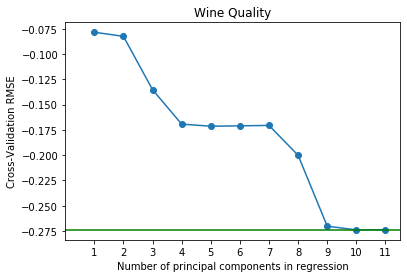

In [186]:
# Plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-Validation RMSE')
plt.title('Wine Quality')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

In [187]:
# Visually determine optimal number of principal components
best_pc_num = 9

In [188]:
# Train model on training set
lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

In [189]:
# Get R2 score
lin_reg_pc.score(X_train_pc[:,:best_pc_num], y_train)

0.27611360734592916

In [190]:
pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                       X_train_pc[:,:best_pc_num], 
                                       y_train, 
                                       cv=cv)
pcr_score_train

array([-0.29470743, -0.27922424, -0.25593946, -0.25963096, -0.23539652,
       -0.27530561, -0.26652021, -0.21483964, -0.27847633, -0.34145077])

In [191]:
# Get principal components of test set
X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]
X_test_pc.shape

(980, 9)

In [ ]:

# Predict on test data
preds = lin_reg_pc.predict(X_test_pc)
pcr_score_test = mean_squared_error(y_test, preds, squared=False)
pcr_score_test